Applying Naive Bayes and Marko Models on Student Performance Database

https://archive.ics.uci.edu/dataset/320/student+performance

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from hmmlearn import hmm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('student-por.csv', sep=';')

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

In [6]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


In [7]:
X = data.drop(['G3'], axis=1)
y = data['G3']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Naive Bayes

In [10]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_pred = nb.predict(X_test_scaled)
print("Naive Bayes Error:", accuracy_score(y_test, nb_pred))

Naive Bayes Error: 0.1


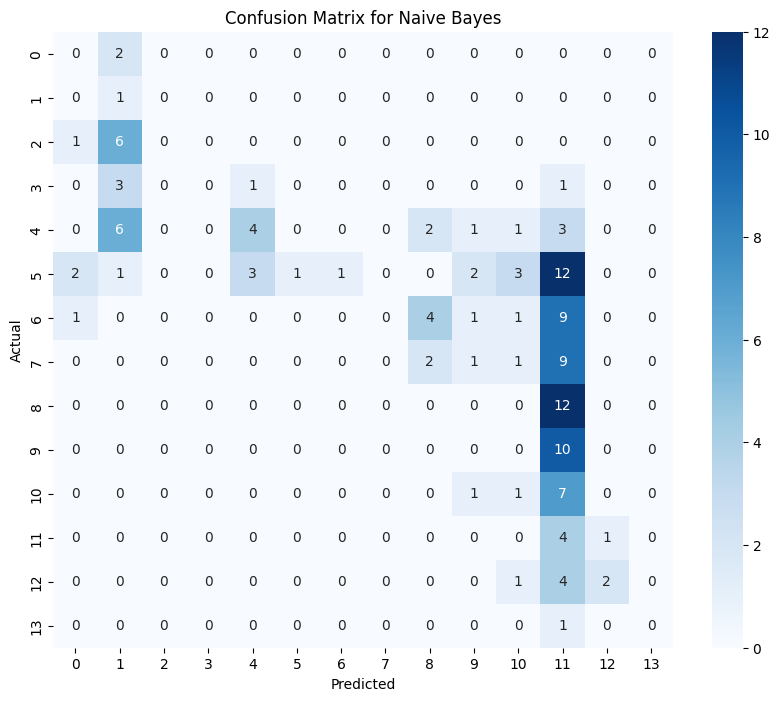

In [10]:
cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

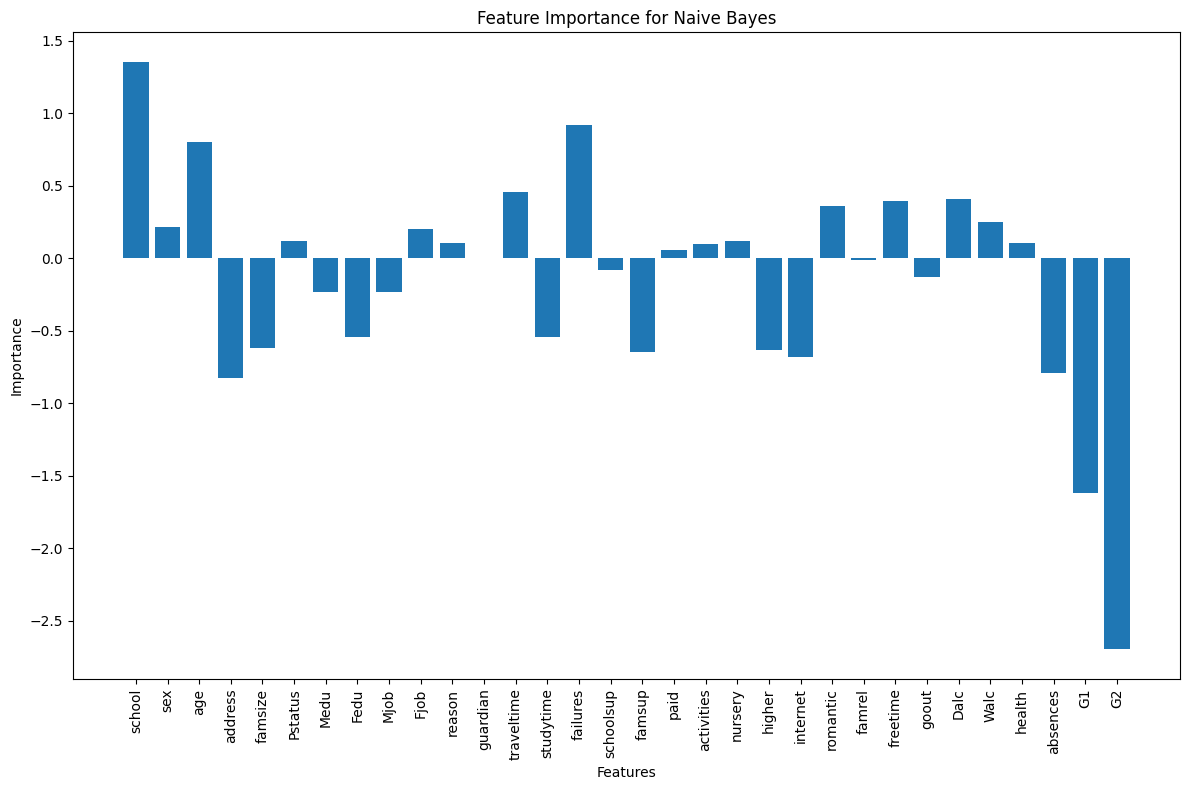

In [11]:
feature_importance = nb.theta_[0]
plt.figure(figsize=(12,8))
plt.bar(X.columns, feature_importance)
plt.title('Feature Importance for Naive Bayes')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Markov Model

In [13]:
#using G1 G2 G3 as sequence

In [15]:
grades = data[['G1', 'G2', 'G3']].values
#normalizng
grades = (grades - grades.min()) / (grades.max() - grades.min())
grades = [grade for grade in grades]
grades[0:5]

[array([0.        , 0.57894737, 0.57894737]),
 array([0.47368421, 0.57894737, 0.57894737]),
 array([0.63157895, 0.68421053, 0.63157895]),
 array([0.73684211, 0.73684211, 0.73684211]),
 array([0.57894737, 0.68421053, 0.68421053])]

In [16]:
model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.fit(grades)

predictions = []
for grade in grades:
    prediction = model.predict(grade.reshape(1, -1))
    predictions.append(prediction[-1])

In [17]:
predictions = np.array(predictions) * (data['G3'].max() - data['G3'].min()) + data['G3'].min()

print("Markov Model Mean Absolute Error:", np.mean(np.abs(predictions - data['G3'])))

Markov Model Mean Absolute Error: 26.093990755007706


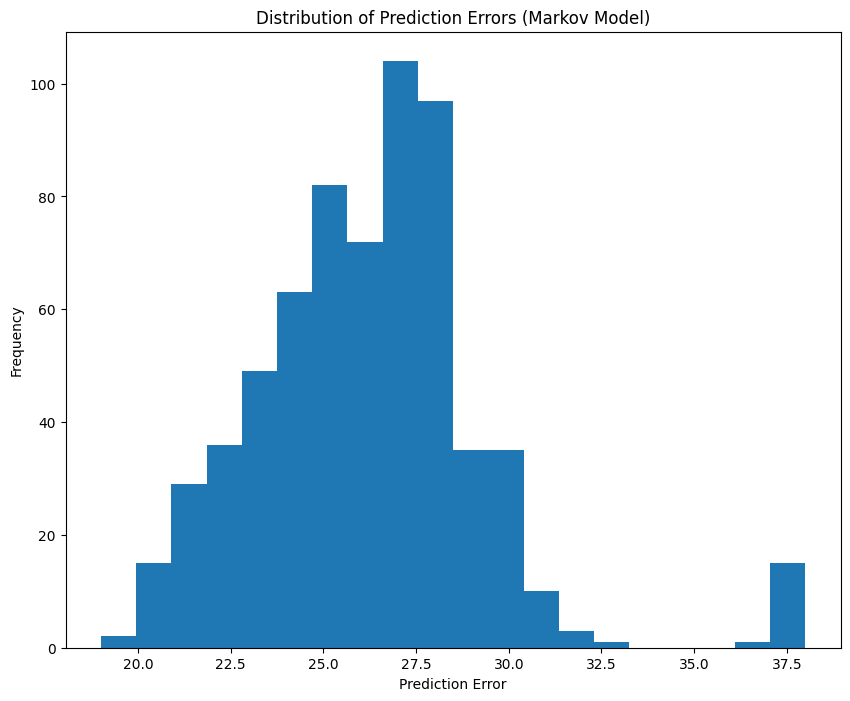

In [19]:
errors = predictions - data['G3']
plt.figure(figsize=(10,8))
plt.hist(errors, bins=20)
plt.title('Distribution of Prediction Errors (Markov Model)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

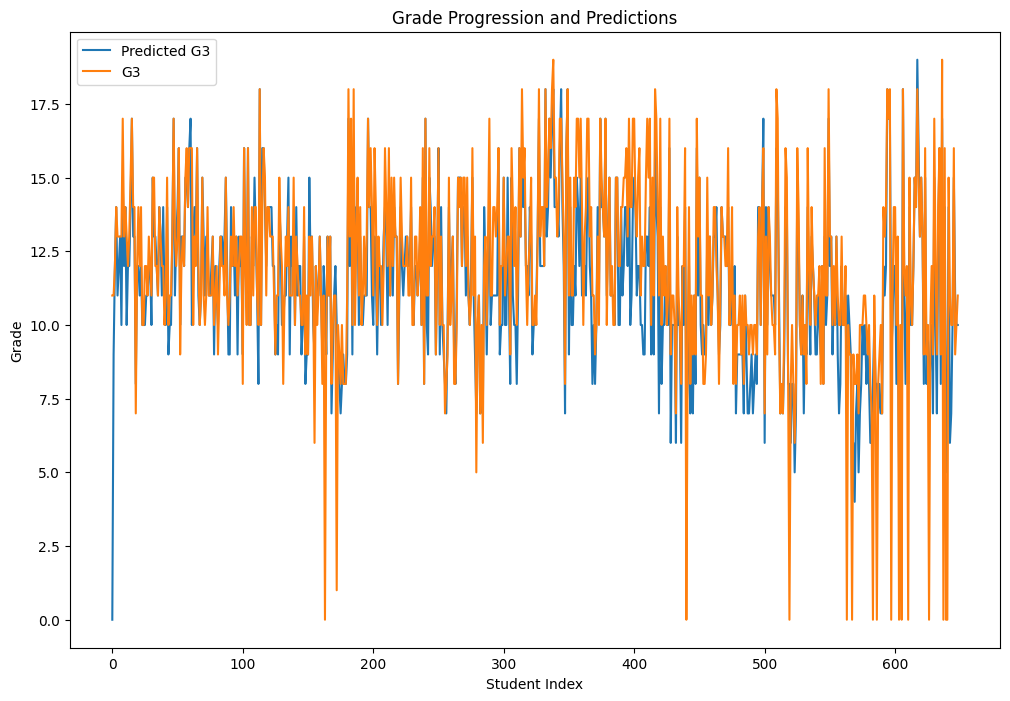

In [21]:
plt.figure(figsize=(12,8))
plt.plot(predictions, label='Predicted G3')
plt.plot(data['G3'], label='G3')
plt.title('Grade Progression and Predictions')
plt.xlabel('Student Index')
plt.ylabel('Grade')
plt.legend()
plt.show()

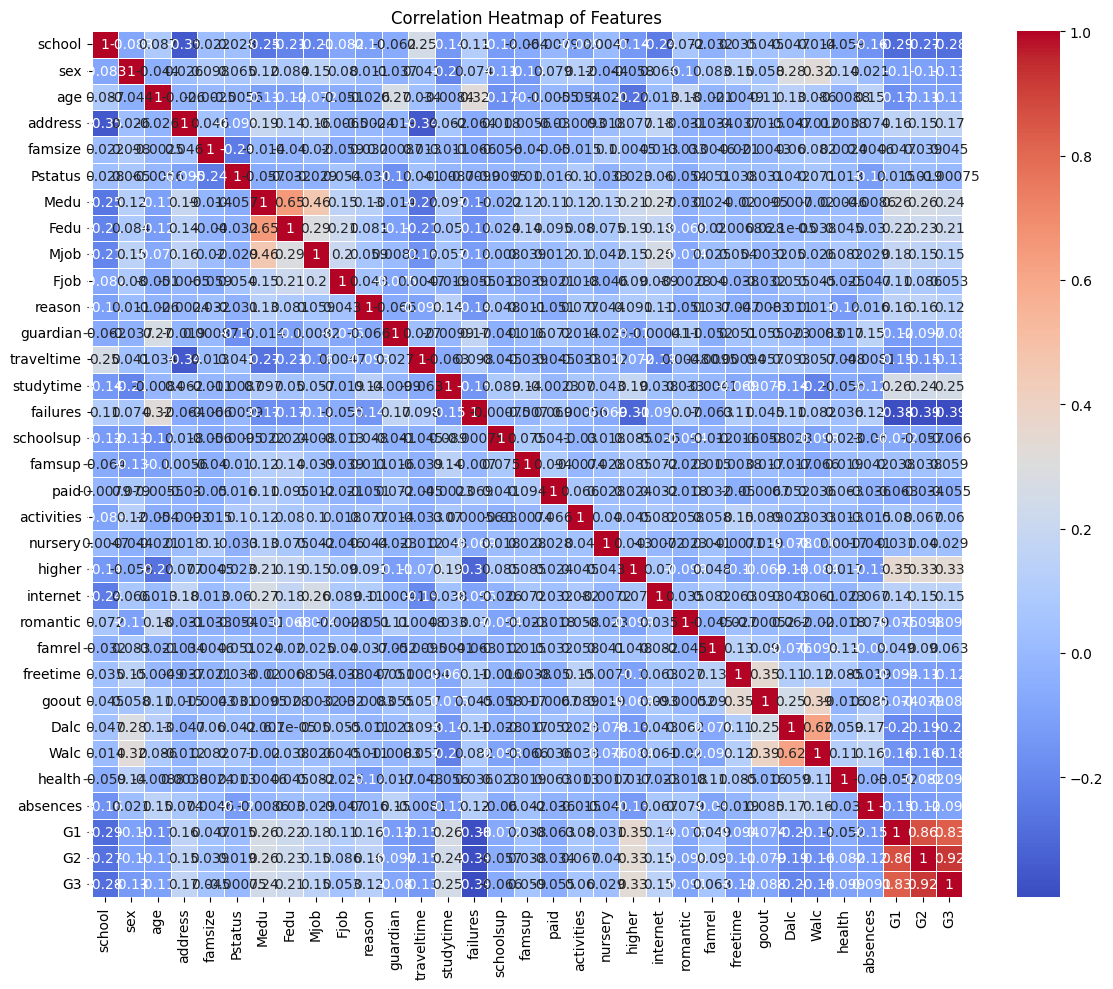

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

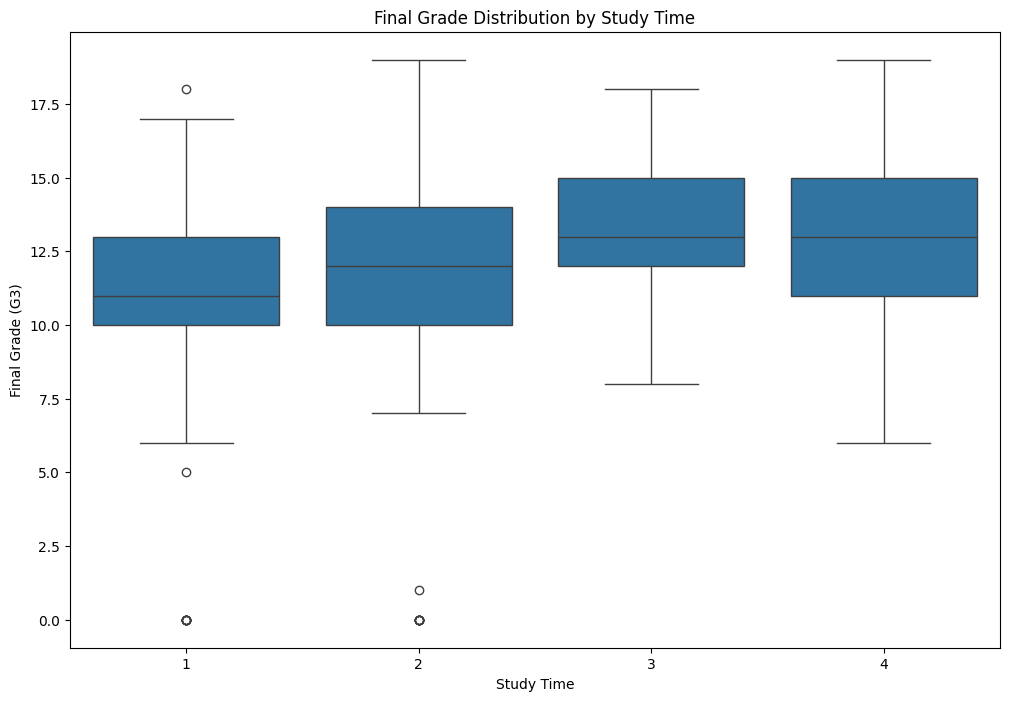

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x='studytime', y='G3', data=data)
plt.title('Final Grade Distribution by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

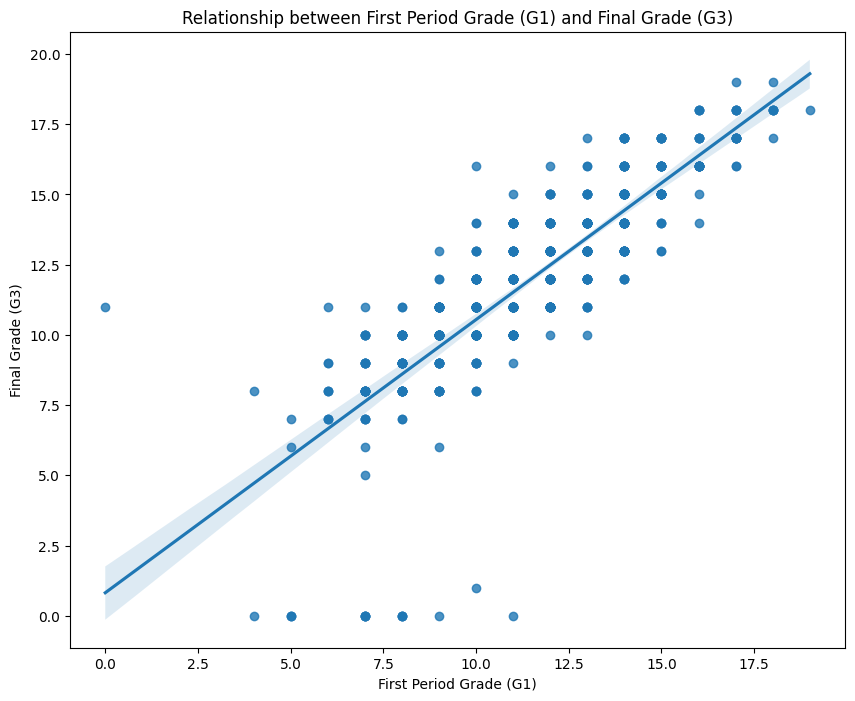

In [24]:
plt.figure(figsize=(10,8))
sns.regplot(x='G1', y='G3', data=data)
plt.title('Relationship between First Period Grade (G1) and Final Grade (G3)')
plt.xlabel('First Period Grade (G1)')
plt.ylabel('Final Grade (G3)')
plt.show()